In [151]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Random under-sampling:
1    24825
0    24825
Name: TARGET, dtype: int64


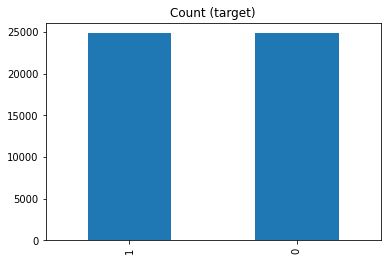

In [152]:
df = pd.read_csv("./data.csv")

# Random Under-Sampling
df_success = df[df['TARGET'] == 0]
df_failure = df[df['TARGET'] == 1]
df_success_under = df_success.sample(df.TARGET.value_counts()[1])
df_test_under = pd.concat([df_success_under, df_failure], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (target)');

df_under = df_test_under;

In [153]:
outcome_under = df_under['TARGET']
df_under = df_under.drop(['TARGET'], axis=1)
df_under = df_under.drop(['SK_ID_CURR'], axis=1)
df_under['DAYS_BIRTH'] = abs(df_under['DAYS_BIRTH']);
df_under['DAYS_EMPLOYED'] = abs(df_under['DAYS_EMPLOYED']);
df_under = df_under.loc[:, ['DAYS_BIRTH', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']];
df_under = df_under.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
le = preprocessing.LabelEncoder()
for column in df_under:
    if type(df_under[column].iloc[0]) == str:
        df_under[column] = le.fit_transform(df_under[column])

outcome = df['TARGET']
df = df.drop(['TARGET'], axis=1)
df = df.drop(['SK_ID_CURR'], axis=1)
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH']);
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']);
df = df.loc[:, ['DAYS_BIRTH', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']];
#df=df.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       #'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       #'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       #'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       #'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       #'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       #'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       #'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       #'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       #'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       #'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       #'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       #'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       #'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       #'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       #'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)
#df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].apply(lambda o: 0 if o == "Cash loans" else 1)
#df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda o: 0 if o == "F" else 1)
#df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].apply(lambda o: 0 if o == "N" else 1)
#df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].apply(lambda o: 0 if o == "N" else 1)
df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
le = preprocessing.LabelEncoder()
#df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
#df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
#df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
#df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
for column in df:
    if type(df[column].iloc[0]) == str:
        df[column] = le.fit_transform(df[column])

In [154]:
# Split the data for prediction
X_train, X_test, y_train, y_test = train_test_split(df, outcome, shuffle=True, random_state=1)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(df_under, outcome_under, shuffle=True, random_state=1)

In [155]:
# Scale and Standardize Data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train_under)

X_train = scaler.transform(X_train_under)

In [156]:
# Make prediction
clf = RandomForestClassifier(criterion="entropy", max_features="sqrt", n_estimators=100, random_state=0)
clf.fit(X_train_under, y_train_under);
accuracy = clf.score(X_test_under, y_test_under);

In [128]:
# Find most predictive words using information gain
importances_sorted = clf.feature_importances_;
importances_sorted[::-1].sort();

In [129]:
topattributes = [];
for i in range(6):
    index = np.where(clf.feature_importances_ == importances_sorted[i]);
    topattributes.append(df.columns[index[0]]);
topattributes


[Index(['DAYS_BIRTH'], dtype='object'),
 Index(['DAYS_ID_PUBLISH'], dtype='object'),
 Index(['DAYS_EMPLOYED'], dtype='object'),
 Index(['DAYS_REGISTRATION'], dtype='object'),
 Index(['DAYS_LAST_PHONE_CHANGE'], dtype='object'),
 Index(['AMT_ANNUITY'], dtype='object')]

In [130]:
df['NAME_TYPE_SUITE'].unique()

array([7, 6, 2, 4, 0, 1, 5, 3])

In [157]:
accuracy = clf.score(X_test, y_test);
accuracy

0.6305575066989255

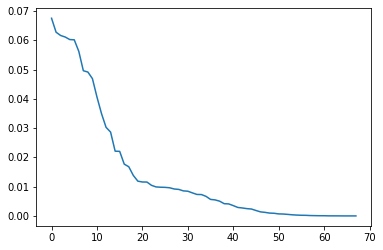

In [132]:
plt.plot(importances_sorted)

In [166]:
d = {'DAYS_BIRTH': [-9461], 'AMT_ANNUITY': [24700.5], 'DAYS_EMPLOYED': [-637], 'AMT_CREDIT': [406597.5], 'AMT_INCOME_TOTAL': [202500.0]}
df = pd.DataFrame(data=d)
#[-9461, 24700.5, -637, 406597.5, 202500.0]
clf.predict([[9461, 10000, 637, 406597.5, 202500.0]])[0]

0

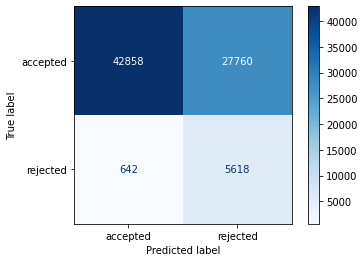

In [159]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['accepted', 'rejected'],
                                 cmap=plt.cm.Blues)

In [101]:
le.classes_

array(['.', 'No', 'Yes'], dtype=object)

In [167]:
import pickle
filename = 'beta_model_1.pkl'
pickle.dump(clf, open(filename, 'wb'))